In [5]:
import pandas as pd
import seaborn as sb
import numpy as np

In [6]:
df = pd.read_csv("groups.csv", sep="|")
df

,group_id,planned_time,real_time,travel_cost,delay,delay_in_%,waiting_time,in_trip_time,walks,path
0,1054,169,169,98,0,0,28,105,2,München ZOB (Hackerbrücke).7861.Arrival->.12.W...
1,1053,169,169,98,0,0,28,105,2,München ZOB (Hackerbrücke).7861.Arrival->.12.W...
2,1052,221,281,156,60,27,73,188,0,Davos Monstein.7903.Departure->40859.13.Trip->...
3,1051,221,281,156,60,27,73,188,0,Davos Monstein.7903.Departure->40859.13.Trip->...
4,1050,169,169,98,0,0,28,105,2,München ZOB (Hackerbrücke).7861.Arrival->.12.W...
...,...,...,...,...,...,...,...,...,...,...
1039,6,63,59,34,-4,-6,10,30,1,München Hbf.7748.Arrival->.14.Walk->München Hb...
1040,5,272,307,101,35,12,19,238,3,München Hbf.7746.Arrival->.14.Walk->München Hb...
1041,4,169,169,98,0,0,28,105,2,München ZOB (Hackerbrücke).7861.Arrival->.12.W...
1042,3,40,100,40,60,150,7,68,0,Donauwörth.7755.Arrival->137265.54.Trip->Münch...


# Calculate different delay cost metrics

In [7]:
print("Total delay:", df["delay"].sum(), "min", "=", df["delay"].sum()/60, "h")
print("Average delay:", np.mean(df["delay"]), "min", "=", np.mean(df["delay"])/60, "h")
print("Median delay:", np.median(df["delay"]), "min", "=", np.median(df["delay"])/60, "h")
print("\n###########################\n")
print("Min delay:", df["delay"].min(), "min", "=", df["delay"].min()/60, "h:")
display(df[df["delay"] == df["delay"].min()])
path = df[df["delay"] == df["delay"].min()]["path"].iloc[0]
print(path)
print("\n###########################\n")
print("Max delay:", df["delay"].max(), "min", "=", df["delay"].max()/60, "h:")
display(df[df["delay"] == df["delay"].max()])
path = df[df["delay"] == df["delay"].max()]["path"].iloc[0]
print(path)
print("\n###########################\n")
print("Average % delay:", np.mean(df["delay_in_%"]), "%")
print("Median % delay:", np.median(df["delay_in_%"]), "%")
print("Min % delay:", df["delay_in_%"].min(), "%")
print("Max % delay:", df["delay_in_%"].max(), "%")

Total delay: 35892 min = 598.2 h
Average delay: 34.37931034482759 min = 0.5729885057471265 h
Median delay: 21.0 min = 0.35 h

###########################

Min delay: -239 min = -3.9833333333333334 h:


,group_id,planned_time,real_time,travel_cost,delay,delay_in_%,waiting_time,in_trip_time,walks,path
639,412,320,81,69,-239,-74,22,35,0,München Hbf.7723.Departure->92851.8.Trip->Münc...


München Hbf.7723.Departure->92851.8.Trip->München Ost.7731.Arrival->München Ost.7742.Departure->107586.27.Trip->Ottenhofen(Oberbay).7769.Arrival

###########################

Max delay: 709 min = 11.816666666666666 h:


,group_id,planned_time,real_time,travel_cost,delay,delay_in_%,waiting_time,in_trip_time,walks,path
760,289,575,1284,250,709,123,226,708,0,Pottendorf-Landegg.7914.Departure->59432.38.Tr...


Pottendorf-Landegg.7914.Departure->59432.38.Trip->Wien Meidling.7952.Arrival->Wien Meidling.7957.Departure->2193.366.Trip->Feldkirch.8323.Arrival->Feldkirch.8328.Departure->3441.92.Trip->Zürich HB.8420.Arrival->Zürich HB.8434.Departure->75357.53.Trip->Basel SBB.8487.Arrival->Basel SBB.8499.Departure->74563.31.Trip->Mulhouse Ville.8530.Arrival->Mulhouse Ville.8550.Departure->16236.70.Trip->Strasbourg.8620.Arrival->Strasbourg.8959.Departure->16718.58.Trip->Wissembourg.9017.Arrival

###########################

Average % delay: 24.14463601532567 %
Median % delay: 13.0 %
Min % delay: -74 %
Max % delay: 314 %


<AxesSubplot:xlabel='delay_in_%', ylabel='Count'>

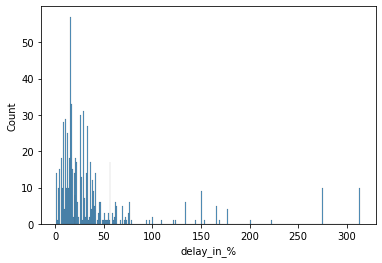

In [110]:
sb.histplot(df, x="delay_in_%", bins=range(1, df["delay_in_%"].max()+1))

<AxesSubplot:xlabel='delay_in_%', ylabel='Count'>

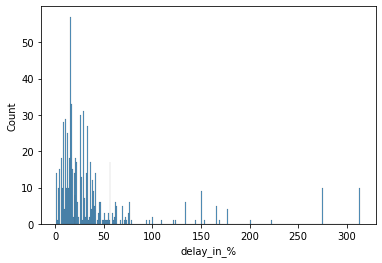

In [111]:
sb.histplot(df, x="delay_in_%", bins=range(1, sorted(df["delay_in_%"])[-10]+1))

# Calculate different travel cost metrics

In [112]:
print("Total travel cost:", df["travel_cost"].sum())
print("Average travel cost:", np.mean(df["travel_cost"]))
print("Median travel cost:", np.median(df["travel_cost"]))
print("Min travel cost:", df["travel_cost"].min())
print("Max travel cost:", df["travel_cost"].max())

Total travel cost: 121518
Average travel cost: 116.39655172413794
Median travel cost: 106.0
Min travel cost: 7
Max travel cost: 360


In [113]:
print("Total number of walks:", df["walks"].sum())
print("Average number of walks:", np.mean(df["walks"]))
print("Median number of walks:", np.median(df["walks"]))
print("Min number of walks:", df["walks"].min())
print("Max number of walks:", df["walks"].max())

Total number of walks: 900
Average number of walks: 0.8620689655172413
Median number of walks: 1.0
Min number of walks: 0
Max number of walks: 4


In [114]:
print("Total waiting time:", df["waiting_time"].sum())
print("Average waiting time:", np.mean(df["waiting_time"]))
print("Median waiting time:", np.median(df["waiting_time"]))
print("Min waiting time:", df["waiting_time"].min())
print("Max waiting time:", df["waiting_time"].max())

Total waiting time: 39077
Average waiting time: 37.43007662835249
Median waiting time: 27.0
Min waiting time: 0
Max waiting time: 402


In [115]:
print("Total time in train:", df["in_trip_time"].sum())
print("Average time in train:", np.mean(df["in_trip_time"]))
print("Median time in train:", np.median(df["in_trip_time"]))
print("Min time in train:", df["in_trip_time"].min())
print("Max time in train:", df["in_trip_time"].max())

Total time in train: 202650
Average time in train: 194.10919540229884
Median time in train: 173.0
Min time in train: 2
Max time in train: 708


# Calculate different edge cost metrics

In [116]:
df = pd.read_csv("edges.csv", sep="|")
df

,edge_index,duration,capacity,utilization
0,EdgeIndex(2562607),1,447,14
1,EdgeIndex(58565),2,375,15
2,EdgeIndex(3062665),6,133,27
3,EdgeIndex(2828349),4,230,5
4,EdgeIndex(345657),4,146,11
...,...,...,...,...
3415,EdgeIndex(2602593),2,256,1
3416,EdgeIndex(2602591),2,256,2
3417,EdgeIndex(1745923),3,143,50
3418,EdgeIndex(2589929),2,342,17


In [117]:
print("Number of strained trip edges:", len(df))
df_filtered = df[df['capacity'] < df['utilization']].loc[:]
print("Number of strained trip edges with utilization > capacity:", len(df_filtered))
df_filtered["overload"] = df_filtered["utilization"]-df_filtered["capacity"]
total_overload = df_filtered["overload"].sum()
print("Total overload (only edges with utilization > capacity):", total_overload)
print("Average overload (only edges with utilization > capacity):", total_overload/len(df_filtered))
print("Max overload of one edge:", df_filtered["overload"].max())
df_filtered

Number of strained trip edges: 3420
Number of strained trip edges with utilization > capacity: 174
Total overload (only edges with utilization > capacity): 1245
Average overload (only edges with utilization > capacity): 7.155172413793103
Max overload of one edge: 42


,edge_index,duration,capacity,utilization,overload
49,EdgeIndex(324155),10,0,9,9
82,EdgeIndex(3415731),31,0,2,2
94,EdgeIndex(3390441),90,2,5,3
118,EdgeIndex(3487723),3,0,2,2
121,EdgeIndex(1734557),31,0,5,5
...,...,...,...,...,...
3309,EdgeIndex(3394419),52,0,1,1
3324,EdgeIndex(3390069),4,0,23,23
3332,EdgeIndex(1767105),29,0,10,10
3366,EdgeIndex(3411413),30,0,2,2


<AxesSubplot:xlabel='overload', ylabel='Count'>

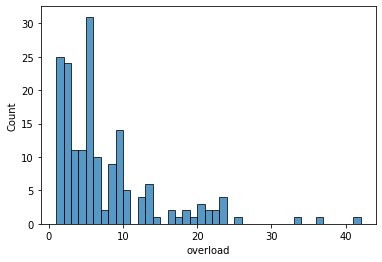

In [118]:
sb.histplot(df_filtered, x="overload", bins=range(1, df_filtered["overload"].max()+1))